# Improving a Model

* First prediction = Baseline predictions
* First model = Baseline model

**From a data perspective:**

* Could we collect more data?(Generally more data,the better)
* Could we improve our data?

**From a model perspective:**

* Is there a better model wecolud use?
* Could we improve our current model?

**Hyperparameter vs Parameters**

* Parameter = model find this patterns in data
* Hyperparameter = settings on a model can adjust to improve its ability to find patterns

**Three way to adjust Hyperparameters**

1. By hand
2. Randomly with RandomSearch CV
3. Grid Search CV

In [30]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [3]:
X = df.drop(["target"],axis = 1)
y = df["target"]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 2)

clf = RandomForestClassifier()

In [5]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Tuning Hyperparameter

* We are going to adjust 
1. max_depth
2. max_features
3. max_leaf_nodes
4. n-estimators
5. min sample leaf
6. min sample split

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [33]:
def model_evaluate(y_true,y_pred):
    
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(f1,2)}
    
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"precision: {precision:.2f}")
    print(f"recall :{recall:.2f}")
    print(f"F1 :{f1:.2f}")
    
    return metric_dict


In [34]:
from sklearn.ensemble import RandomForestClassifier

#Shuffle the data
df_shuffled = df.sample(frac = 1)

#spliting the data
X = df_shuffled.drop(["target"],axis =1)
y = df_shuffled["target"]

#split the data into training_set,valid_set,test_set
train_split = round(0.7 * len(df_shuffled))  # 70% of data
valid_split = round(train_split + 0.15 *len(df_shuffled))  # 15% of data

In [35]:
valid_split,train_split

(257, 212)

In [36]:
ym = y[valid_split:]
len(ym)

46

In [37]:
len(X)

303

In [43]:
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

In [44]:
len(y_train),len(y_valid),len(y_test)

(212, 45, 46)

In [45]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#Making prediction on valid set
y_pred = clf.predict(X_valid)

#Evaluate the classifier
baseline_metrics = model_evaluate(y_valid,y_pred)

Accuracy: 75.56%
precision: 0.64
recall :0.82
F1 :0.72


## Tuning Hyperparameter with RandomizedSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [48]:
grid = {"n_estimators":[100,150,200,250,300,350,500,1000],
        "max_depth" :[None,5,10,20,30,40],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(10)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

clf_2 = RandomForestClassifier(n_jobs = 1)

#setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(clf_2,
                            param_distributions = grid,
                            n_iter = 10,
                            cv = 5,
                            verbose = 2)

#fit the data
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=350, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=350, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.7s
[CV] n_estimators=350, min_samples_split=6, min_

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=2, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [49]:
rs_clf.best_params_

{'n_estimators': 350,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None}

In [58]:
#Make prediction with best Hyperparameter
rs_pred = rs_clf.predict(X_test)

#Evaluate the prediction
rs_metrics = model_evaluate(y_test,rs_pred)

Accuracy: 81.32%
precision: 0.78
recall :0.90
F1 :0.83


## Tuning hyperparameter with Grid Search CV

* Key difference between Randomized SearchCV and Grid SearchCV is Grid SearchCV runs all the posible combination of given hyperparameter..

In [51]:
from sklearn.model_selection import GridSearchCV

* Grid search cv runs all the possible combination.so it will take long to run all combination..If the dataset is huge then it will be a drawback..For this we can take help from the best parameters from randomized cv model.

In [53]:
rs_clf.best_params_

{'n_estimators': 350,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None}

In [54]:
grid_1 =  {"n_estimators":[250,300,350,500,1000],
           "max_depth" :[None],
           "max_features":["auto"],
           "min_samples_split":[4,6],
           "min_samples_leaf":[2,4]}

#setup grid search CV
clf = RandomForestClassifier(n_jobs = 1)

gs_clf = GridSearchCV(clf,
                      param_grid = grid_1,
                      cv= 5,
                      verbose = 1)

#Fit the GridSearch version

gs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [55]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [59]:
gs_pred = gs_clf.predict(X_test)

#Evaluate the model

gs_metrics = model_evaluate(y_test,gs_pred)

Accuracy: 78.02%
precision: 0.77
recall :0.83
F1 :0.80


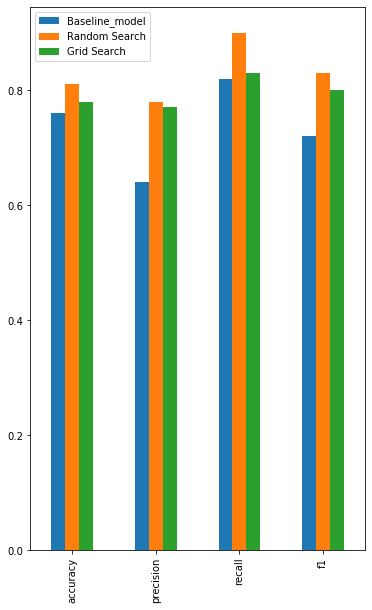

In [62]:
# compare different model metrics

import matplotlib.pyplot as plt

compare_metrics = pd.DataFrame({"Baseline_model":baseline_metrics,
                                "Random Search":rs_metrics,
                                "Grid Search": gs_metrics})

compare_metrics.plot.bar(figsize = (6,10))

## Saving and Loading trained machine learning model

Two way to save and load model

1. Pickle Module
2. joblib Module

### Pickle


In [63]:
import pickle 

#save an existing model to file
#saving the grid search model

pickle.dump(gs_clf,open("Grid_Search_Random_Forest_Model.pkl","wb"))

In [64]:
# Loading the saved model

loaded_model = pickle.load(open("Grid_Search_Random_Forest_Model.pkl","rb"))

In [65]:
# Make prediction with loaded model

pickle_y_pred = loaded_model.predict(X_test)

model_evaluate(y_test,pickle_y_pred)

Accuracy: 78.02%
precision: 0.77
recall :0.83
F1 :0.80


{'accuracy': 0.78, 'precision': 0.77, 'recall': 0.83, 'f1': 0.8}

In [66]:
#check with the grid model

model_evaluate(y_test,gs_pred)

Accuracy: 78.02%
precision: 0.77
recall :0.83
F1 :0.80


{'accuracy': 0.78, 'precision': 0.77, 'recall': 0.83, 'f1': 0.8}

### Joblib

In [67]:
from joblib import dump ,load

#save model to file
dump(gs_clf, filename = "Grid_model.joblib")

['Grid_model.joblib']

In [68]:
#load the saved model
loaded_joblib_model = load(filename = "Grid_model.joblib")

In [ ]:
#Make prediction
joblib_y_pred = loaded_joblib_model.predict(X_test)

model_evalu